# S10 T01: Aprenentage Supervisat

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats
from scipy.stats import norm
from scipy import stats
from scipy.stats import t
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from six import StringIO
from IPython.display import Image  
import pydotplus
import math
import xgboost as xgb
from xgboost import plot_tree
from numpy.polynomial.polynomial import polyfit
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from IPython.display import HTML, display_html, display

## Exercici 1. Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

De l'exercici S09_T01, hem guardat com a csv el dataframe vols05, que està net de NaN i que conté els dummies de CancellationCode. L'importem i extraiem informació.

In [2]:
vols = pd.read_csv('//home/rusi/Escritorio/rubenIT/DataSources/vols05.csv')#importem i li assignem un nom de dataframe

Insertem una columna que tingui el valor 0 si ArrDelay<=0, i valor 1 si ArrDelay>0

In [3]:
vols["ArrDelay02"]=[0 if v<=0 else 1 for v in vols["ArrDelay"]]

In [4]:
print(vols.info())
print(vols.describe())
print(vols.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 36 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Unnamed: 0.1       int64  
 2   Year               int64  
 3   Month              int64  
 4   DayofMonth         int64  
 5   DayOfWeek          int64  
 6   DepTime            float64
 7   CRSDepTime         int64  
 8   ArrTime            float64
 9   CRSArrTime         int64  
 10  UniqueCarrier      object 
 11  FlightNum          int64  
 12  TailNum            object 
 13  ActualElapsedTime  float64
 14  CRSElapsedTime     float64
 15  AirTime            float64
 16  ArrDelay           float64
 17  DepDelay           float64
 18  Origin             object 
 19  Dest               object 
 20  Distance           int64  
 21  TaxiIn             float64
 22  TaxiOut            float64
 23  Cancelled          int64  
 24  CancellationCode   object 
 25  Diverted          

In [5]:
vols.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Year', 'Month', 'DayofMonth',
       'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'A', 'B', 'C', 'N', 'ArrDelay02'],
      dtype='object')

In [6]:
vols.describe(include = "all")

Unnamed: 0  Unnamed: 0.1       Year         Month    DayofMonth  \
count   1.936758e+06  1.936758e+06  1936758.0  1.936758e+06  1.936758e+06   
unique           NaN           NaN        NaN           NaN           NaN   
top              NaN           NaN        NaN           NaN           NaN   
freq             NaN           NaN        NaN           NaN           NaN   
mean    9.683785e+05  3.341651e+06     2008.0  6.111106e+00  1.575347e+01   
std     5.590940e+05  2.066065e+06        0.0  3.482546e+00  8.776272e+00   
min     0.000000e+00  0.000000e+00     2008.0  1.000000e+00  1.000000e+00   
25%     4.841892e+05  1.517452e+06     2008.0  3.000000e+00  8.000000e+00   
50%     9.683785e+05  3.242558e+06     2008.0  6.000000e+00  1.600000e+01   
75%     1.452568e+06  4.972467e+06     2008.0  9.000000e+00  2.300000e+01   
max     1.936757e+06  7.009727e+06     2008.0  1.200000e+01  3.100000e+01   

           DayOfWeek       DepTime    CRSDepTime       ArrTime    CRSArrTime  \
count   1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    3.984827e+00  1.518534e+03  1.467473e+03  1.604230e+03  1.634225e+03   
std     1.995966e+00  4.504853e+02  4.247668e+02  5.557685e+02  4.646347e+02   
min     1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.000000e+00  1.203000e+03  1.135000e+03  1.313000e+03  1.325000e+03   
50%     4.000000e+00  1.545000e+03  1.510000e+03  1.714000e+03  1.705000e+03   
75%     6.000000e+00  1.900000e+03  1.815000e+03  2.030000e+03  2.014000e+03   
max     7.000000e+00  2.400000e+03  2.359000e+03  2.400000e+03  2.400000e+03   

        ...  CarrierDelay  WeatherDelay      NASDelay  SecurityDelay  \
count   ...  1.936758e+06  1.936758e+06  1.936758e+06   1.936758e+06   
unique  ...           NaN           NaN           NaN            NaN   
top     ...           NaN           NaN           NaN            NaN   
freq    ...           NaN           NaN           NaN            NaN   
mean    ...  1.235367e+01  2.385512e+00  9.675607e+00   5.805836e-02   
std     ...  3.613493e+01  1.734036e+01  2.808958e+01   1.623934e+00   
min     ...  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%     ...  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%     ...  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
75%     ...  1.000000e+01  0.000000e+00  6.000000e+00   0.000000e+00   
max     ...  2.436000e+03  1.352000e+03  1.357000e+03   3.920000e+02   

        LateAircraftDelay             A             B             C  \
count        1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean         1.629374e+01  1.270164e-04  1.585123e-04  4.130614e-05   
std          3.585904e+01  1.126944e-02  1.258917e-02  6.426854e-03   
min          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%          1.800000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
max          1.316000e+03  1.000000e+00  1.000000e+00  1.000000e+00   

                   N    ArrDelay02  
count   1.936758e+06  1.936758e+06  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    9.996732e-01  8.898453e-01  
std     1.807562e-02  3.130826e-01  
min     0.000000e+00  0.000000e+00  
25%     1.000000e+00  1.000000e+00  
50%     1.000000e+00  1.000000e+00  
75%     1.000000e+00  1.000000e+00  

Prescindim de les columnes Unnamed, que són repeticions de l'índex.

In [7]:
vols02=vols.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [8]:
vols02.describe(include="all")

Year         Month    DayofMonth     DayOfWeek       DepTime  \
count   1936758.0  1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
unique        NaN           NaN           NaN           NaN           NaN   
top           NaN           NaN           NaN           NaN           NaN   
freq          NaN           NaN           NaN           NaN           NaN   
mean       2008.0  6.111106e+00  1.575347e+01  3.984827e+00  1.518534e+03   
std           0.0  3.482546e+00  8.776272e+00  1.995966e+00  4.504853e+02   
min        2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%        2008.0  3.000000e+00  8.000000e+00  2.000000e+00  1.203000e+03   
50%        2008.0  6.000000e+00  1.600000e+01  4.000000e+00  1.545000e+03   
75%        2008.0  9.000000e+00  2.300000e+01  6.000000e+00  1.900000e+03   
max        2008.0  1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03   

          CRSDepTime       ArrTime    CRSArrTime UniqueCarrier     FlightNum  \
count   1.936758e+06  1.936758e+06  1.936758e+06       1936758  1.936758e+06   
unique           NaN           NaN           NaN            20           NaN   
top              NaN           NaN           NaN            WN           NaN   
freq             NaN           NaN           NaN        377602           NaN   
mean    1.467473e+03  1.604230e+03  1.634225e+03           NaN  2.184263e+03   
std     4.247668e+02  5.557685e+02  4.646347e+02           NaN  1.944702e+03   
min     0.000000e+00  0.000000e+00  0.000000e+00           NaN  1.000000e+00   
25%     1.135000e+03  1.313000e+03  1.325000e+03           NaN  6.100000e+02   
50%     1.510000e+03  1.714000e+03  1.705000e+03           NaN  1.543000e+03   
75%     1.815000e+03  2.030000e+03  2.014000e+03           NaN  3.422000e+03   
max     2.359000e+03  2.400000e+03  2.400000e+03           NaN  9.742000e+03   

        ...  CarrierDelay  WeatherDelay      NASDelay  SecurityDelay  \
count   ...  1.936758e+06  1.936758e+06  1.936758e+06   1.936758e+06   
unique  ...           NaN           NaN           NaN            NaN   
top     ...           NaN           NaN           NaN            NaN   
freq    ...           NaN           NaN           NaN            NaN   
mean    ...  1.235367e+01  2.385512e+00  9.675607e+00   5.805836e-02   
std     ...  3.613493e+01  1.734036e+01  2.808958e+01   1.623934e+00   
min     ...  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%     ...  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%     ...  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
75%     ...  1.000000e+01  0.000000e+00  6.000000e+00   0.000000e+00   
max     ...  2.436000e+03  1.352000e+03  1.357000e+03   3.920000e+02   

        LateAircraftDelay             A             B             C  \
count        1.936758e+06  1.936758e+06  1.936758e+06  1.936758e+06   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean         1.629374e+01  1.270164e-04  1.585123e-04  4.130614e-05   
std          3.585904e+01  1.126944e-02  1.258917e-02  6.426854e-03   
min          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%          1.800000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
max          1.316000e+03  1.000000e+00  1.000000e+00  1.000000e+00   

                   N    ArrDelay02  
count   1.936758e+06  1.936758e+06  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean    9.996732e-01  8.898453e-01  
std     1.807562e-02  3.130826e-01  
min     0.000000e+00  0.000000e+00  
25%     1.000000e+00  1.000000e+00  
50%     1.000000e+00  1.000000e+00  
75%     1.000000e+00  1.000000e+00  
ma

Agafarem les columnes "CarrierDelay" i "DepDelay" com a *features* i "ArrDelay02" com a *target*.

In [9]:
vols03=vols02[["CarrierDelay","DepDelay","ArrDelay02"]]
print(vols03.describe())

       CarrierDelay      DepDelay    ArrDelay02
count  1.936758e+06  1.936758e+06  1.936758e+06
mean   1.235367e+01  4.318518e+01  8.898453e-01
std    3.613493e+01  5.340250e+01  3.130826e-01
min    0.000000e+00  6.000000e+00  0.000000e+00
25%    0.000000e+00  1.200000e+01  1.000000e+00
50%    0.000000e+00  2.400000e+01  1.000000e+00
75%    1.000000e+01  5.300000e+01  1.000000e+00
max    2.436000e+03  2.467000e+03  1.000000e+00


In [10]:
comptabilitza = vols03.groupby(["ArrDelay02"]).size()
print(comptabilitza)
print("Percentatge 0: "+str(round(comptabilitza[0]/(comptabilitza[0]+comptabilitza[1]),2)))
print("Percentatge 1: "+str(round(comptabilitza[1]/(comptabilitza[0]+comptabilitza[1]),2)))

ArrDelay02
0     213343
1    1723415
dtype: int64
Percentatge 0: 0.11
Percentatge 1: 0.89


Veiem com predominen els "1"; és a dir, que hi ha molts més endarreriments que vols puntuals.
Comencem la creació dels models de classificació, amb **Decission Tree**.

### 1r model. Decission Tree

In [11]:
#Feature selection
X=vols02[["CarrierDelay","DepDelay"]]
y=vols02[["ArrDelay02"]]

In [12]:
#Splitting data amb un 30% de dades pel test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
# Model Accuracy, how often is the classifier correct?
accuracy_DT=metrics.accuracy_score(y_test, y_pred)
print("Accuracy Decission Tree:",accuracy_DT)

Accuracy Decission Tree: 0.8899278520140166


In [15]:
#Visualizing Decision Trees
feature_columns=X.columns
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,
                feature_names = feature_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("//home//rusi//Escritorio//vols.png")
Image(graph.create_png())

In [16]:
#optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf02 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
clf02 = clf02.fit(X_train,y_train)
#Predict the response for test dataset
y_pred02 = clf02.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy_DT_Optim=metrics.accuracy_score(y_test, y_pred02)
print("Accuracy:",accuracy_DT_Optim)

Accuracy: 0.8899485050634393


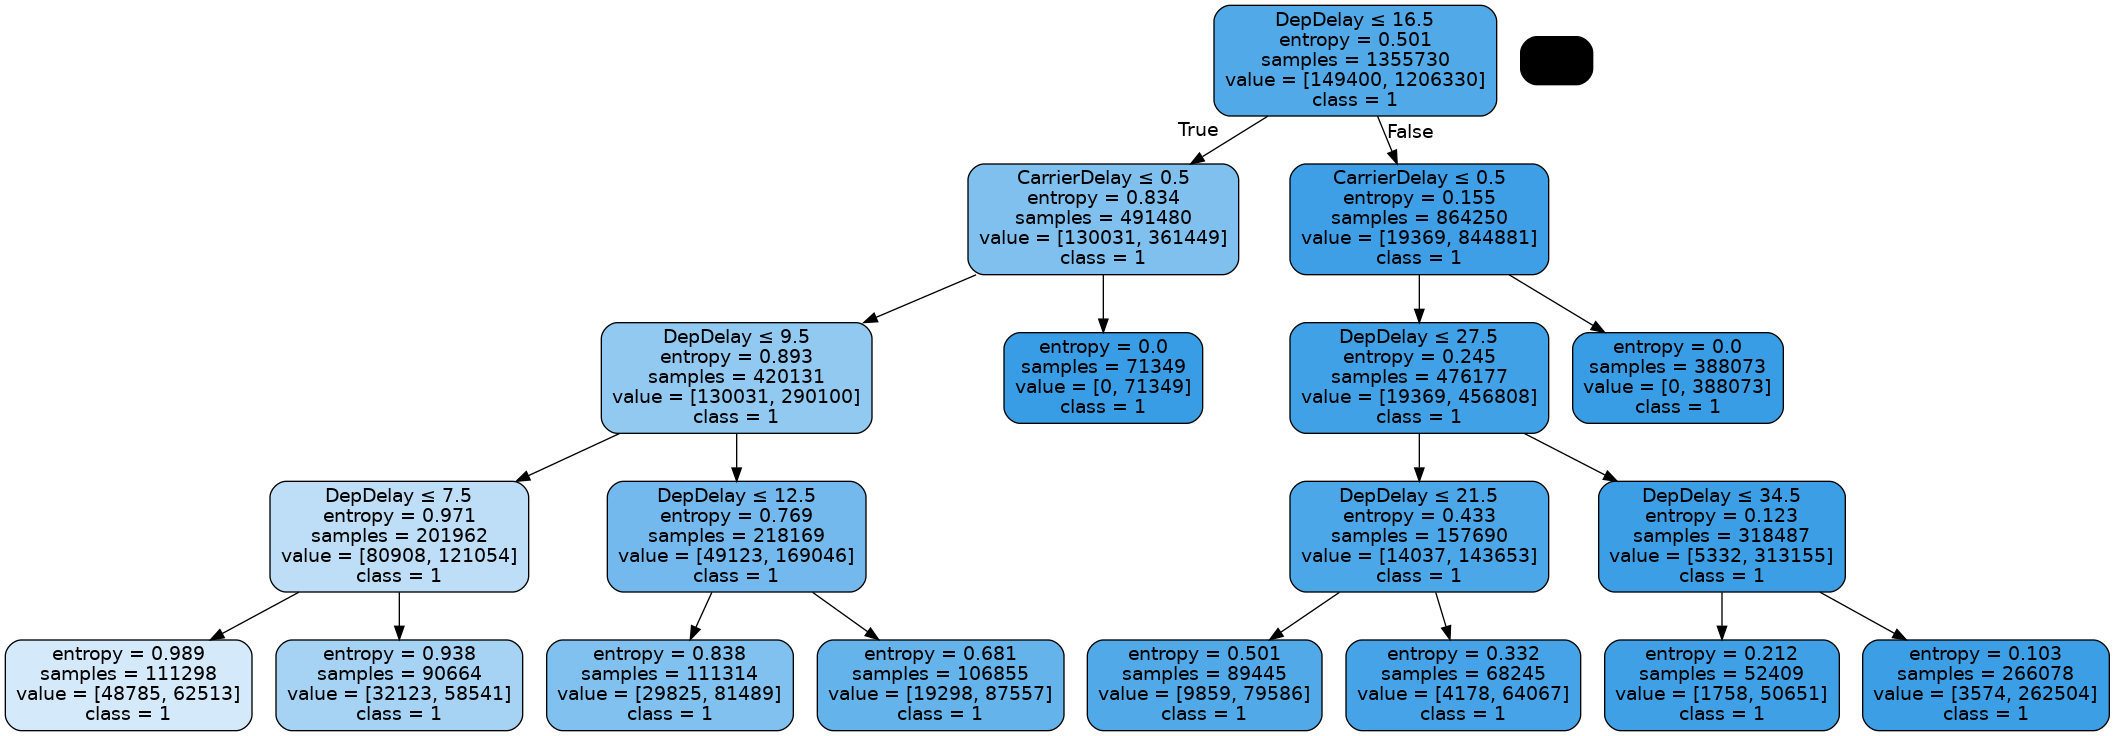

In [17]:
#Dibuixem de nou el Decission Tree optimitzat amb 4 capes
dot_data02 = StringIO()
export_graphviz(clf02, out_file=dot_data02,filled=True, rounded=True,special_characters=True,
                feature_names = feature_columns,class_names=['0','1'])
graph02= pydotplus.graph_from_dot_data(dot_data02.getvalue())  
graph02.write_png("//home//rusi//Escritorio//vols_optimitzats.png")
Image(graph02.create_png())

**Conclusió:** amb Decission Tree hem obtingut un accuracy de 0.889927. Després hem optimitzat a 4 capes i hem millorat sensiblement accuracy a 0.889948, tot i que aquesta optimització no comprèn els valors de class=0. Per tant, l'optimització ens donaria una estructura molt lleugera i un bon resultat, però sense comprendre els valors de vols puntuals.

### 2n Model. K-nearest neighbors (KNN)

L'aplicació d'aquest model requereix una gran quantitat de temps. Escalem les dades d'entrada (feature scaling) i reduïm el número de neighbors per tractar d'agilitzar el càlcul.

In [18]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_KNN = scaler.transform(X_train)
#X_test_KNN = scaler.transform(X_test)

In [19]:
#clf_KNN = KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
#clf_KNN.fit(X_train_KNN, y_train)

In [20]:
#y_pred_KNN = clf_KNN.predict(X_test_KNN)

In [21]:
# Model Accuracy, how often is the classifier correct?
#print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred_KNN))

**NOTA:** Abandonem aquest model perquè el temps de realització del càlcul és molt elevat, i optem per substituir el model per un altre.

### 2n Model bis. Logistic Regression

In [22]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [23]:
y_pred_logreg=logreg.predict(X_test)
print(y_pred_logreg)

[1 1 1 ... 1 1 1]


In [24]:
accuracy_LogReg=metrics.accuracy_score(y_test, y_pred_logreg)
print("Accuracy Logistic Regression:",accuracy_LogReg)

Accuracy Logistic Regression: 0.8899485050634393


Aquest model de fàcil i ràpida implantació, dona un resultat idèntic a l'optimització del Decission Tree.

### 3r model XGBoost

In [25]:
#convert the dataset into an optimized data structure called Dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [26]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

In [27]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
preds = xgb_model.predict(X_test)
print(preds)

/home/rusi/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.88067
[1]	validation_0-auc:0.88078
[2]	validation_0-auc:0.88079
[3]	validation_0-auc:0.88079
[4]	validation_0-auc:0.88085
[5]	validation_0-auc:0.88085
[6]	validation_0-auc:0.88086
[7]	validation_0-auc:0.88086
[8]	validation_0-auc:0.88091
[9]	validation_0-auc:0.88093
[10]	validation_0-auc:0.88093
[11]	validation_0-auc:0.88093
[12]	validation_0-auc:0.88093
[13]	validation_0-auc:0.88094
[14]	validation_0-auc:0.88094
[15]	validation_0-auc:0.88094
[16]	validation_0-auc:0.88094
[17]	validation_0-auc:0.88093
[1 1 1 ... 1 1 1]


In [28]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.331740


In [29]:
y_pred_XGBoost = xgb_model.predict(X_test)
accuracy_XGBoost=accuracy_score(y_test, y_pred_XGBoost)
print(accuracy_XGBoost)

0.8899485050634393


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

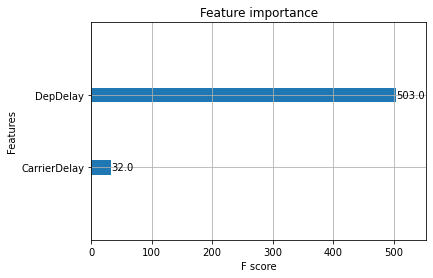

In [30]:
xgb.plot_importance(xgb_model)

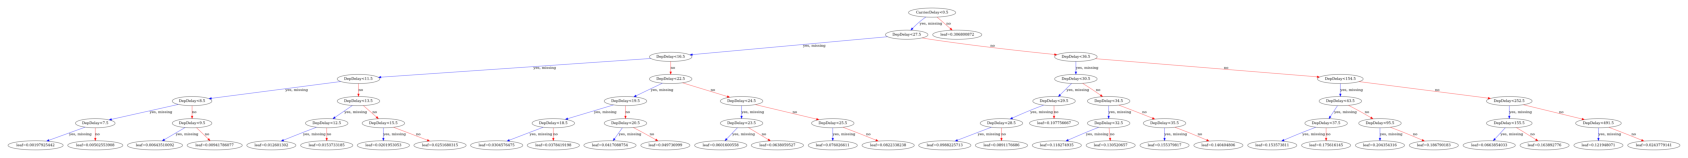

In [31]:
plot_tree(xgb_model, num_trees=10)
fig = plt.gcf()
fig.set_size_inches(30, 15)
fig.savefig("//home//rusi//Escritorio//xgboost.png", dpi=100)

Obtenim la mateixa accuracy que el model 2b i 1 optimitzat.

## Exercici 2. Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

### Comparació dels accuracy obtinguts

Podem comprovar com els accuracy calculats en l'exercici anterior tenen el mateix resultat (en el Decission Tree ha calgut fer una optimització de 4 capes per augmentar molt lleugerament el resultat inicial). Aquesta rotunditat en el mateix resultat de la precisió ens fa pensar que la metodologia és molt semblant, i que els targets categòrics són molt nombrosos en 1 (hi ha retard), fent que la prediccio tendeixi a aquesta conclusió.

In [33]:
print("Accuracy Decission Tree:",accuracy_DT)
print("Accuracy Decission Tree Optimized:",accuracy_DT_Optim)
print("Accuracy Logistic Regression:",accuracy_LogReg)
print("Accuracy XGBoost: ",accuracy_XGBoost)

Accuracy Decission Tree: 0.8899278520140166
Accuracy Decission Tree Optimized: 0.8899485050634393
Accuracy Logistic Regression: 0.8899485050634393
Accuracy XGBoost:  0.8899485050634393


### Confussion matrix

In [54]:
print("Decission Tree")
a=metrics.confusion_matrix(y_test, y_pred)
print(a)

Decission Tree
[[     1  63942]
 [    13 517072]]


In [55]:
print("Decission Tree optimized")
b=metrics.confusion_matrix(y_test, y_pred02)
print(b)

Decission Tree optimized
[[     0  63943]
 [     0 517085]]


In [50]:
print("Logistic regression")
print(metrics.confusion_matrix(y_test, y_pred_logreg))

Logistic regression
[[     0  63943]
 [     0 517085]]


In [51]:
print("XGBoost")
print(metrics.confusion_matrix(y_test, y_pred_XGBoost))

XGBoost
[[     0  63943]
 [     0 517085]]


Observem la diferència entre la matriu abans i després d'optimitzar amb Decission Tree. Aquesta última té els mateixos valors que Logistic Regression i XGBoost. Els interpretem així:
- True Positives (TP) [1 1]: predicció correcta que hi hauria retard: 517085 casos.
- True Negatives (TN) [0 0]: predicció correcta que no hi hauria retard: 0 casos.
- False Positives (FP) [0 1]: predicció incorrecta que hi hauria retard (Type I error): 63943 casos.
- False Negatives (FN) [1 0]: predicció incorrecta que no hi hauria retard (Type II error): 0 casos.

Podem calcular el percentatge de casos no encertats i comparar-los amb la precisió, per comprovar que és el mateix càlcul.

In [62]:
c=b[0,1]/(b[0,1]+b[1,1])
print(c)
d=1-c
print(d)

0.11005149493656072
0.8899485050634393


### Altres mètriques

A continuació, calculem altres mètriques, amb l'explicació donada a les següents pàgines web:

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

In [75]:
#Matriu de confusió
TP = b[1, 1]
TN = b[0, 0]
FP = b[0, 1]
FN = b[1, 0]
print(b)

[[     0  63943]
 [     0 517085]]


#### Classification Error: Overall, how often is the classifier incorrect?
    Also known as "Misclassification Rate"
    
Veurem que l'error amb un mètode i l'altre són gairebé nuls, donant un resultat de 0.110.

In [66]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred02))

0.11005149493656072
0.11005149493656075


#### Sensitivity: When the actual value is positive, how often is the prediction correct?

    Something we want to maximize
    How "sensitive" is the classifier to detecting positive instances?
    Also known as "True Positive Rate" or "Recall"
    TP / all positive
        all positive = TP + FN



Del càlcul, es pot veure que sempre donarà una predicció correcta quan hi ha un valor positiu (o retard).

In [68]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred02))

1.0
1.0


#### Specificity: When the actual value is negative, how often is the prediction correct?

    Something we want to maximize
    How "specific" (or "selective") is the classifier in predicting positive instances?
    TN / all negative
        all negative = TN + FP


S'observa en el càlcul que no es detectarà en la predicció quan hi ha un valor negatiu.

In [70]:
specificity = TN / (TN + FP)
print(specificity)

0.0


#### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [71]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

1.0
1.0


#### Precision: When a positive value is predicted, how often is the prediction correct?

    How "precise" is the classifier when predicting positive instances?

In [72]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred02))

0.8899485050634393
0.8899485050634393


#### F1 score. 
F-score is a machine learning model performance metric that gives equal weight to both the Precision and Recall for measuring its performance in terms of accuracy, making it an alternative to Accuracy metrics (it doesn’t require us to know the total number of observations).

F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score/)

In [74]:
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(F1_score)

0.9417701092692646


El valor de F1_score és més elevat que Accuracy. Podríem interpretar que, com aquest indicador té en compte els positius amb el mateix pes cadascú, i que els positius (retards) són predominants en els valors, fa que sigui més elevat en precisió que la pròpia Accuracy. 

## Exercici 3. Entrena’ls utilitzant els diferents paràmetres que admeten.

En l'exercici 1 s'ha entrenat els diferents models. Fem una recapitulació a continuació, i afegim algusn apràmetres.

**Decision Tree**. Comparem canviant el paràmetre "entropy" a "gini", canviem el max_depth a 1 i splitter a random, i comprovem que no hi ha variacions en score, per exemple.

In [80]:
clf02 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf02.fit(X_train,y_train)
#print(clf02.predict(X[:2,:]))
#print(clf02.predict_proba(X[:2, :]))
print(clf02.score(X, y))

0.8898452981735457


In [87]:
clf02 = DecisionTreeClassifier(criterion="gini", splitter="random",max_depth=1)
clf02.fit(X_train,y_train)
#print(clf02.predict(X[:2,:]))
#print(clf02.predict_proba(X[:2, :]))
print(clf02.score(X, y))

0.8898452981735457


**Logistical regression**. Canviem el mètode d'optimització de "lbfgs" (default) a "newton-cg" i comprovem que no hi ha diferència en el score, per exemple.

In [82]:
logreg = LogisticRegression(solver="newton-cg")
logreg.fit(X_train,y_train)
print(logreg.score(X, y))

/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8898452981735457


In [83]:
logreg = LogisticRegression(solver="lbfgs")
logreg.fit(X_train,y_train)
print(logreg.score(X, y))

/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8898452981735457


**XGBoost**. 

In [89]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
print(xgb_model.score(X, y))

[0]	validation_0-auc:0.88067
[1]	validation_0-auc:0.88078
[2]	validation_0-auc:0.88079
[3]	validation_0-auc:0.88079
[4]	validation_0-auc:0.88085
[5]	validation_0-auc:0.88085
[6]	validation_0-auc:0.88086
[7]	validation_0-auc:0.88086
[8]	validation_0-auc:0.88091
[9]	validation_0-auc:0.88093
[10]	validation_0-auc:0.88093
[11]	validation_0-auc:0.88093
[12]	validation_0-auc:0.88093
[13]	validation_0-auc:0.88094
[14]	validation_0-auc:0.88094
[15]	validation_0-auc:0.88094
[16]	validation_0-auc:0.88094
[17]	validation_0-auc:0.88093
0.8898452981735457


## Exercici 4. Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

**Decission tree**

In [90]:
scores_DT = cross_val_score(clf02, X, y, cv=5)
print(scores_DT)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_DT.mean(), scores_DT.std()))

[0.88984438 0.88984438 0.88984438 0.88984668 0.88984668]
0.89 accuracy with a standard deviation of 0.00


**Logistical Regression**

In [92]:
scores_LR = cross_val_score(logreg, X, y, cv=5)
print(scores_LR)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_LR.mean(), scores_LR.std()))

/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/rusi/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[0.88984438 0.88984438 0.88984438 0.88984668 0.88984668]
0.89 accuracy with a standard deviation of 0.00


**XGBoost**

In [94]:
scores_XGB = cross_val_score(xgb_model, X, y, cv=5)
print(scores_XGB)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_XGB.mean(), scores_XGB.std()))

[0.88984438 0.88984438 0.88984438 0.88984668 0.88984668]
0.89 accuracy with a standard deviation of 0.00


Aplicant cross-validation en els tres models, obtenim els resultats idèntics d'accuracy i desviació: 0.89 i 0.0, respectivament. Això ens fa pensar, que l'opció de model més addient seria la que donés el resultat més ràpidament i amb menys consum de memòria. En aquest sentit, ens decantaríem per XGBoost com l'elecció final, sense detriment dels altres.

## Exercici 5. Realitza algun procés d’enginyeria de variables per millorar-ne la predicci

Ens decantem pel featuring scaling, i normalitzem les dades d'entrada. Després aplicarem el mètode Decission Tree optimitzat.

In [99]:
#Creem la funció
def minmax_norm(df_input):
    return (X - X.min()) / ( X.max() - X.min())

X_minmax_norm = minmax_norm(X)

print(X_minmax_norm.describe())
print(y.describe())

X_train, X_test, y_train, y_test = train_test_split(X_minmax_norm, y, test_size=0.33, random_state=4)



       CarrierDelay      DepDelay
count  1.936758e+06  1.936758e+06
mean   5.071293e-03  1.510978e-02
std    1.483371e-02  2.169951e-02
min    0.000000e+00  0.000000e+00
25%    0.000000e+00  2.438033e-03
50%    0.000000e+00  7.314100e-03
75%    4.105090e-03  1.909793e-02
max    1.000000e+00  1.000000e+00
         ArrDelay02
count  1.936758e+06
mean   8.898453e-01
std    3.130826e-01
min    0.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    1.000000e+00
max    1.000000e+00


In [102]:
#optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf03 = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
clf03 = clf03.fit(X_train,y_train)
#Predict the response for test dataset
y_pred03 = clf03.predict(X_test)
# Model Accuracy, how often is the classifier correct?
accuracy_DT_Optim02=metrics.accuracy_score(y_test, y_pred03)
print("Accuracy Decission Tree Optimitzada amb feature scaling:",accuracy_DT_Optim02)
print("Accuracy Decission Tree Optimitzada sense feature scaling:",accuracy_DT_Optim)

Accuracy Decission Tree Optimitzada amb feature scaling: 0.8897581247036992
Accuracy Decission Tree Optimitzada sense feature scaling: 0.8899485050634393


Aplicant el feature scaling, hem baixat la precisió o accuracy, de 0.88994 a 0.88975. No és una diferència important, però existent. Això es podria haver donat perquè s'ha perdut sensibilitat en convertir les dades a una escala de 0 a 1, ja que fa pensar que l'algorisme tipus tree redueix les seves branques o decisions i perd poder de predicció, però en una forma molt poc significativa.

## Exercici 6. No utilitzis la variable DepDelay a l’hora de fer prediccions

Fem servir "LateAircraftDelay" en substitució de "DepDelay", i apliquem el mètode de XGBoost.

In [103]:
#Feature selection
X=vols02[["CarrierDelay","LateAircraftDelay"]]
y=vols02[["ArrDelay02"]]

In [104]:
xgb_model02 = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

In [105]:
xgb_model02.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])
preds02 = xgb_model02.predict(X_test)
print(preds02)

/home/rusi/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.87989
[1]	validation_0-auc:0.88004
[2]	validation_0-auc:0.88006
[3]	validation_0-auc:0.88009
[4]	validation_0-auc:0.88009
[5]	validation_0-auc:0.88013
[6]	validation_0-auc:0.88013
[7]	validation_0-auc:0.88018
[8]	validation_0-auc:0.88018
[9]	validation_0-auc:0.88020
[10]	validation_0-auc:0.88020
[11]	validation_0-auc:0.88021
[12]	validation_0-auc:0.88020
[13]	validation_0-auc:0.88020
[14]	validation_0-auc:0.88020
[15]	validation_0-auc:0.88020
[1 1 1 ... 1 1 1]


In [111]:
rmse02 = np.sqrt(mean_squared_error(y_test, preds02))
print("RMSE sense DepDelay: %f" % (rmse))
print("RMSE sense DepDelay: %f" % (rmse02))

RMSE sense DepDelay: 0.331740
RMSE sense DepDelay: 0.332027


In [110]:
y_pred_XGBoost02 = xgb_model02.predict(X_test)
accuracy_XGBoost02=accuracy_score(y_test, y_pred_XGBoost02)
print("Accuracy amb DepDelay: ", accuracy_XGBoost)
print("Accuracy sense DepDelay: ", accuracy_XGBoost02)

Accuracy amb DepDelay:  0.8899485050634393
Accuracy sense DepDelay:  0.8897581247036992


In [113]:
scores_XGB02 = cross_val_score(xgb_model02, X, y, cv=5)
print("XGBoos scores de cross-validation amb DepDelay: ", scores_XGB)
print("XGBoos scores de cross-validation sense DepDelay: ", scores_XGB02)
print("%0.5f accuracy with a standard deviation of %0.2f (amb DepDelay)" % (scores_XGB.mean(), scores_XGB.std()))
print("%0.5f accuracy with a standard deviation of %0.2f (sense DepDelay)" % (scores_XGB02.mean(), scores_XGB02.std()))

XGBoos scores de cross-validation amb DepDelay:  [0.88984438 0.88984438 0.88984438 0.88984668 0.88984668]
XGBoos scores de cross-validation sense DepDelay:  [0.88984438 0.88984438 0.88984438 0.88984668 0.88984668]
0.88985 accuracy with a standard deviation of 0.00 (amb DepDelay)
0.88985 accuracy with a standard deviation of 0.00 (sense DepDelay)


Sorprenentment, la precisió o Accuracy gairebé no ha canviat, passant de 0.88994 amb DepDelay a 0.88975 sense tenir-ne. Si no anem errats, la metodologia tipus tree, en aquest cas seguint el model XGBoost, proporciona un model predictiu molt sòlid i precís, tot i no tenir unes variables independents molt completes, però sí en gran nombre.